# Deconvolution test

First, we import all necessary libraries

In [1]:
import os
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

import m8r 

We then create the "raw_traces" file by sftraces module, which creates a number of impulse response traces with reverberations and a hidden dipping layer.

In [2]:
%%file raw_traces.scons

Flow('raw_traces',None,'traces 2')

Result('raw_traces','wiggle transp=y yreverse=y poly=y clip=1.7 title="Impulse response traces for decon"')

Overwriting raw_traces.scons


m8r.view() program plots these traces

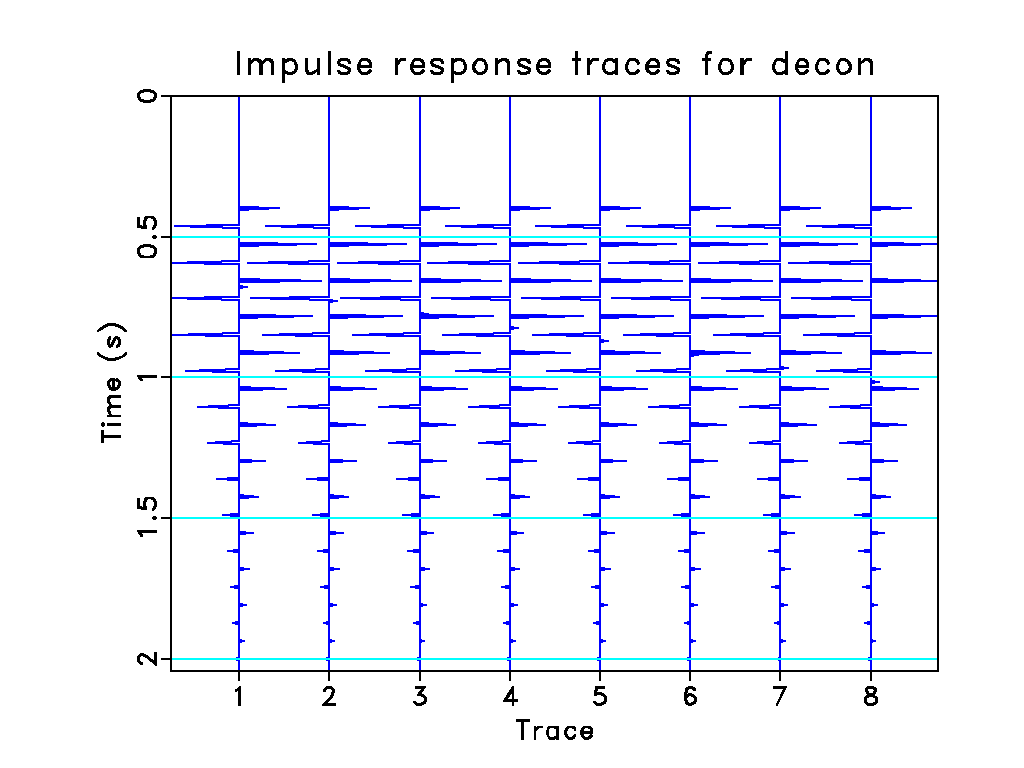

In [3]:
m8r.view('raw_traces')

Now we filter the data with a minimum-phase bandpass filter and add noise

In [4]:
%%file model_data.scons

#Flow('wavelet',None,'spike n1=7 nsp=7 k1=1,2,3,4,5,6,7 mag=1.152,-0.384,-0.904,0.288,0.174,-0.034,-0.012')

#Flow('model_data','raw_traces wavelet',"conv filt=${SOURCES[1]} trans=y | noise seed=2013 var=5e-5")

Flow('model_data','raw_traces',"bandpass flo=5 fhi=70 phase=y | noise seed=1 var=5e-5")

Result('model_data','wiggle transp=y yreverse=y poly=y clip=1.3 title="Traces for decon"')

Overwriting model_data.scons


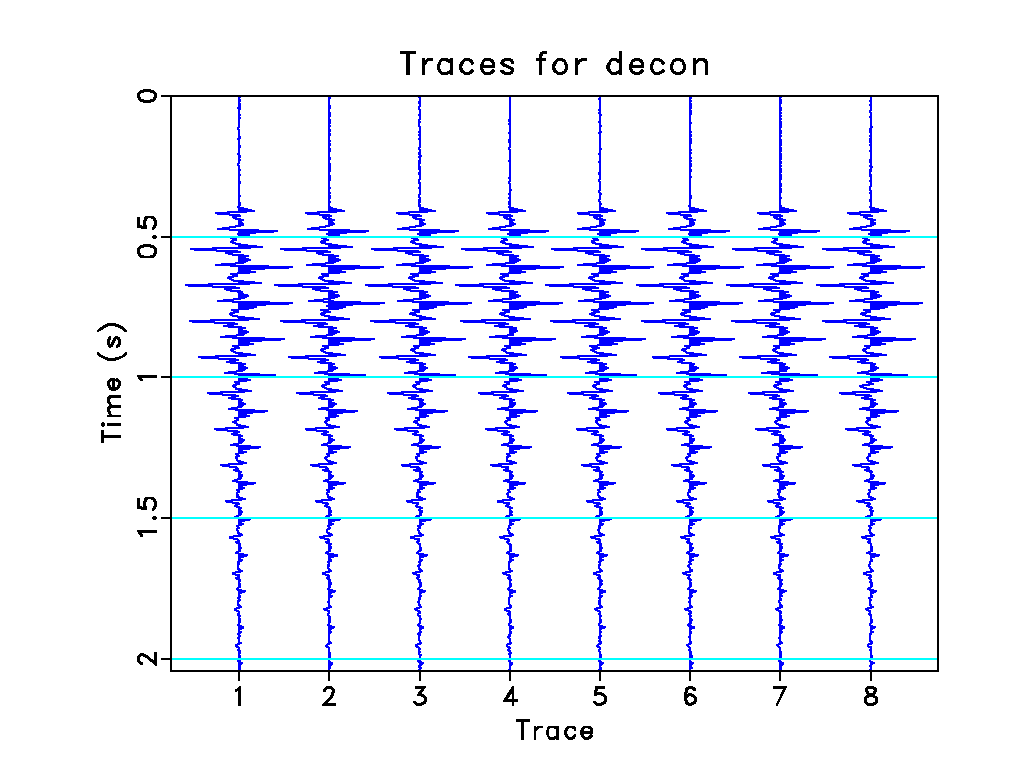

In [5]:
m8r.view('model_data')

In [6]:
!ls

decon_data.scons     model_data.png    raw_traces.png	 SConstruct.jupyter
decon_example.ipynb  model_data.rsf    raw_traces.rsf	 wavelet.rsf
Fig		     model_data.scons  raw_traces.scons


The deconvolution is performed by the sfpef (Wiener predictive error filtering), one can see the dipping layer in the decon results

In [7]:
%%file decon_data.scons

Flow('decon_data','model_data','pef minlag=0.05 maxlag=0.56 pnoise=0.02')

Result('decon_data','wiggle transp=y yreverse=y poly=y clip=0.6 title="Traces after decon"')

Overwriting decon_data.scons


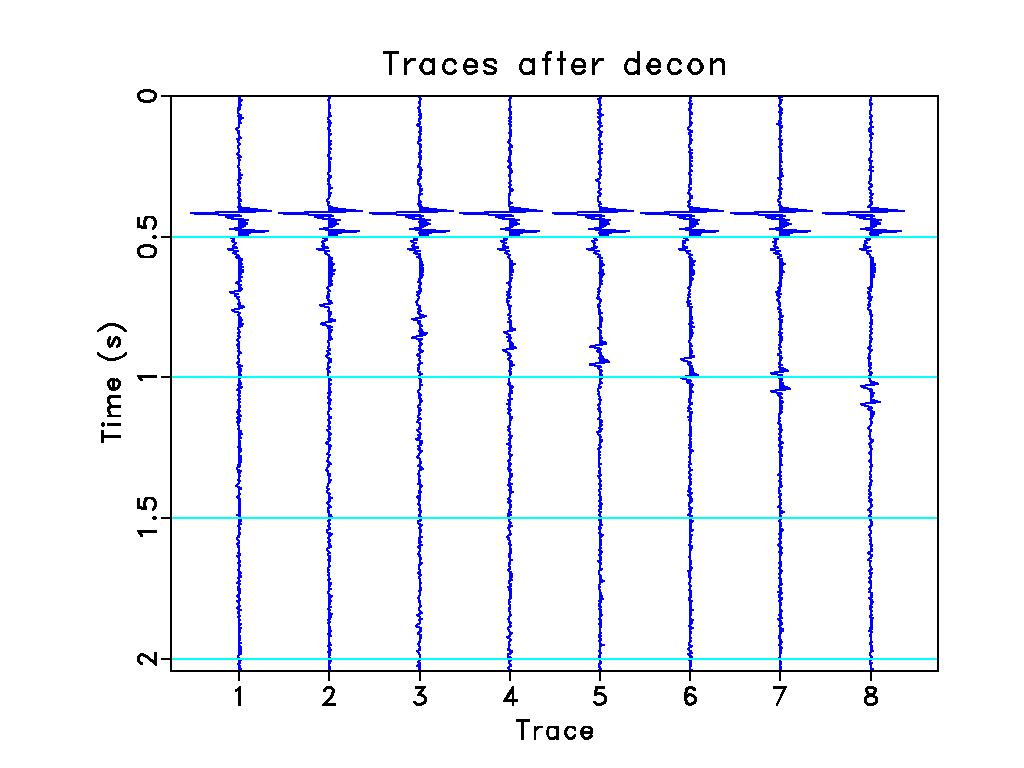

In [8]:
m8r.view('decon_data')

In [9]:
!ls

decon_data.png	     Fig	       raw_traces.png	   wavelet.rsf
decon_data.rsf	     model_data.png    raw_traces.rsf
decon_data.scons     model_data.rsf    raw_traces.scons
decon_example.ipynb  model_data.scons  SConstruct.jupyter
